# Redes Neurais Convolucionais

# Introdução

Você já olhou para um ser e se perguntou se ele era um homem ou um cavalo? Bem, eu também não! Contudo, seu computador provavelmente vai ter dificuldade para responder essa questão (os salafrários faltaram todas as aulas de biologia para estudar mais matemática ainda!). Os usos para um modelo com essas características pode ter diversas aplicações, como um estábulo de uma fazenda que pretende monitorar a ativadade de seus cavalos e não deseja que o computador monitore seus funcionários no lugar (ou o contrário também! (Pobres CLTs...)). Talvez um prefeitura, em busca arrecadar mais, tenha o interesse de multar cavalos em alta velocidade nas ruas, sendo necessário evitar o escândalo de multar os praticantes de corrida olímpica da cidade. Esses são apenas um dos possíveis usos desse modelo um tanto atípico. Logo abaixo segue sua contrução e aplicação.

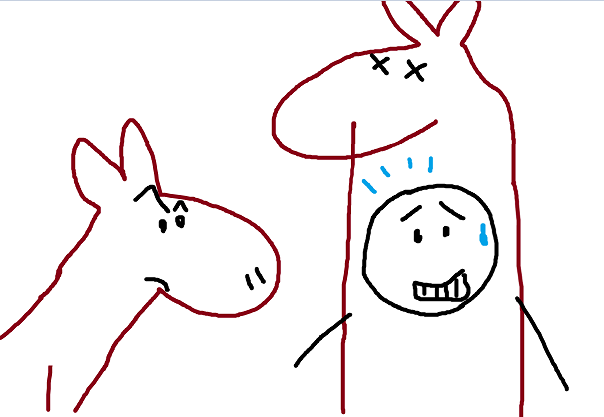

# 1. Escolha do Dataset

## Configuração Inicial

In [18]:
import tensorflow as tf
!pip install tensorflow
!pip install --upgrade tensorflow
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Configurações para melhor visualização
plt.style.use('seaborn')
sns.set_theme()

# Verifica se há GPUs disponíveis
print("GPUs disponíveis:", len(tf.config.experimental.list_physical_devices('GPU')))

GPUs disponíveis: 0


<ipython-input-18-fd03ea06c2e5>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Carregamento e pré-processamento

In [19]:
# Carregamento do dataset "Horses or Humans"
dataset, info = tfds.load('horses_or_humans', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

# 2. Exploração dos dados

Number of training samples: 1027
Number of test samples: 256
Image shape: (300, 300, 3)
Number of classes: 2
Classes: ['horses', 'humans']
Class distribution in training set: {'horses': 500, 'humans': 527}


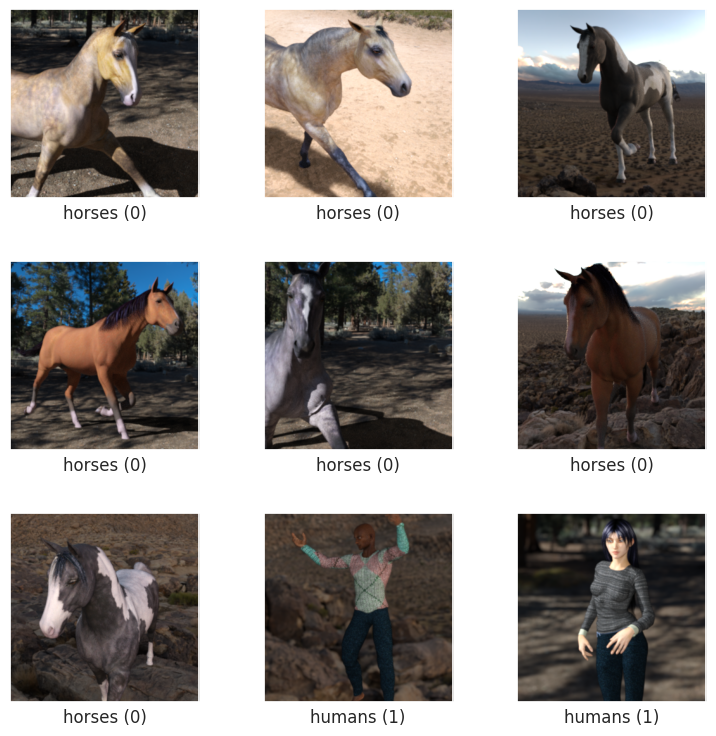

In [20]:
# a) Verificar número de amostras no conjunto de treinamento e teste
num_train_samples = info.splits['train'].num_examples
num_test_samples = info.splits['test'].num_examples
print(f"Number of training samples: {num_train_samples}")
print(f"Number of test samples: {num_test_samples}")

# b) Verificar a estrutura do dataset (tamanho das imagens, número de classes, etc.)
print(f"Image shape: {info.features['image'].shape}")
print(f"Number of classes: {info.features['label'].num_classes}")
print(f"Classes: {info.features['label'].names}")

# c) Visualizar a distribuição das classes no conjunto de treinamento

# Converte o dataset para formato NumPy e extrai as labels
train_labels = [label for _, label in tfds.as_numpy(train_dataset)]

# Calcula a distribuição das classes
unique, counts = np.unique(train_labels, return_counts=True)
class_distribution = dict(zip(info.features['label'].names, counts))
print(f"Class distribution in training set: {class_distribution}")

# d) Visualizar algumas imagens do dataset
fig = tfds.show_examples(train_dataset, info)
plt.show()

# 3. Preparação do conjunto de dados para o treinamento

In [21]:
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128))  # Redimensiona para 128x128 pixels
    image = image / 255.0  # Normalização
    return image, label

train_dataset = train_dataset.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# 4. Divisão dos conjuntos em treino e teste, e treinamento do modelo


## Modelagem

In [22]:
# Construir o modelo da CNN
model = models.Sequential()

# Primeira camada convolucional
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Segunda camada convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Terceira camada convolucional
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten e camadas densas
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Saída binária

# Compilar o modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Treinar o modelo # Aplicação de dez épocas
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset)

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.6503 - loss: 0.6968 - val_accuracy: 0.8086 - val_loss: 0.7813
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9596 - loss: 0.1462 - val_accuracy: 0.8477 - val_loss: 1.2276
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9738 - loss: 0.0653 - val_accuracy: 0.8594 - val_loss: 1.8312
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9963 - loss: 0.0192 - val_accuracy: 0.8516 - val_loss: 1.4467
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9970 - loss: 0.0121 - val_accuracy: 0.8086 - val_loss: 3.0006
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.8359 - val_loss: 2.0284
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9861 - loss: 0.0401 - val_accuracy: 0.6328 - val_loss: 6.5366
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9324 - loss: 0.1939 - val_accuracy: 0.8359 - val_loss:

# 5. Plotagem dos gráficos de perda nas diferentes épocas


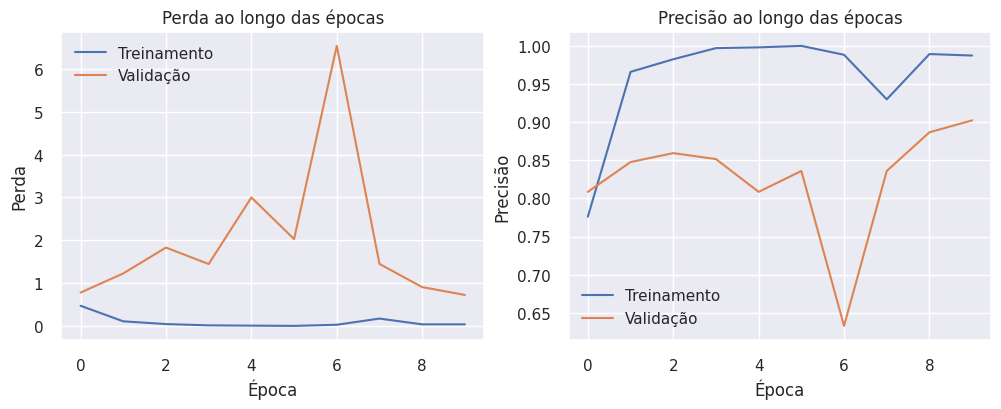

In [24]:
plt.figure(figsize=(12, 4))

# Gráfico de perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Perda ao longo das épocas')
plt.legend()

# Gráfico de precisão
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Precisão')
plt.title('Precisão ao longo das épocas')
plt.legend()

plt.show()

# 6. Interpretação dos resultados

In [25]:
# Avaliar o modelo
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.4f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - accuracy: 0.9293 - loss: 0.5273
Test accuracy: 0.9023


O modelo de classificação teve uma boa precisão de treinamento, ultrapassando 98% a partir da quarta época. Porém, a partir da sexta época as perdas de treinamento e validação começaram a divergir, um possível overfitting. A precisão de validação oscilou, mas acabou se recuperando, com uma precisão de teste de 90,23%. Por fim, o modelo ser revelou um tanto que instável, mesmo com resultados satisfatórios de forma geral.







